## 1. Collecte de données

In [83]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
# Chargement du jeu de données
df = pd.read_csv("paludisme_data.csv")
df.head()

,Age,Sexe,Région,Température,Humidité,Précipitations,Proximité_eau_stagnante,Type_habitat,Contracte_paludisme
0,52,Homme,Ouest,28.504270,89.197807,238.259199,Non,Rural,Non
1,15,Femme,Nord,20.449386,87.907122,27.897192,Non,Urbain,Non
2,72,Homme,Ouest,25.373547,30.296399,176.460680,Oui,Rural,Non
3,61,Femme,Ouest,30.832684,87.108707,144.291867,Non,Urbain,Non
4,21,Homme,Est,32.669564,68.347196,192.697658,Oui,Urbain,Non


## 2.Prétraitement des données 

In [88]:
# Afficher la liste des colonnes
df.columns

Index(['Age', 'Sexe', 'Région', 'Température', 'Humidité', 'Précipitations',
       'Proximité_eau_stagnante', 'Type_habitat', 'Contracte_paludisme'],
      dtype='object')

In [90]:
# Afficher les informations sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      500 non-null    int64  
 1   Sexe                     500 non-null    object 
 2   Région                   500 non-null    object 
 3   Température              500 non-null    float64
 4   Humidité                 500 non-null    float64
 5   Précipitations           500 non-null    float64
 6   Proximité_eau_stagnante  500 non-null    object 
 7   Type_habitat             500 non-null    object 
 8   Contracte_paludisme      500 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 35.3+ KB


In [92]:
# Afficher la dimension du jeu de données
df.shape

(500, 9)

In [94]:
# Afficher les statistiques descriptive
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,38.474000,22.360799,1.000000,19.000000,37.500000,58.250000,79.000000
Température,500.0,30.082886,5.944309,20.127717,24.668914,30.325290,35.251360,39.958682
Humidité,500.0,60.368016,17.323949,30.193096,45.051029,61.144247,74.779118,89.964824
Précipitations,500.0,147.480800,85.479403,0.469532,77.201379,148.601040,218.777152,299.504253


In [96]:
# Rechercher le nombre valeur manquante
df.isnull().sum()

Age                        0
Sexe                       0
Région                     0
Température                0
Humidité                   0
Précipitations             0
Proximité_eau_stagnante    0
Type_habitat               0
Contracte_paludisme        0
dtype: int64

In [98]:
# frequence
df["Région"].value_counts()

Région
Est      133
Sud      124
Nord     122
Ouest    121
Name: count, dtype: int64

In [100]:
df["Contracte_paludisme"].value_counts()

Contracte_paludisme
Non    345
Oui    155
Name: count, dtype: int64

In [102]:
#Tableau croisé
table = pd.crosstab(df['Région'], df['Contracte_paludisme'])
table

Contracte_paludisme,Non,Oui
Région,,
Est,91,42
Nord,85,37
Ouest,81,40
Sud,88,36


In [104]:
pd.crosstab(df['Région'], df['Sexe'])

Sexe,Femme,Homme
Région,,
Est,58,75
Nord,62,60
Ouest,64,57
Sud,52,72


In [106]:
def preprocess_data(df):
    label_encoders = {}
    categorical_columns = ["Sexe", "Région", "Proximité_eau_stagnante", "Type_habitat", "Contracte_paludisme"]
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Normalisation des variables numériques
    scaler = StandardScaler()
    numerical_columns = ["Age", "Température", "Humidité", "Précipitations"]
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df, label_encoders, scaler, numerical_columns

df, label_encoders, scaler, numerical_columns = preprocess_data(df)
df.head()

,Age,Sexe,Région,Température,Humidité,Précipitations,Proximité_eau_stagnante,Type_habitat,Contracte_paludisme
0,0.605504,1,2,-0.265834,1.665825,1.063055,0,0,0
1,-1.050835,0,1,-1.622249,1.591247,-1.400377,0,1,0
2,1.500822,1,2,-0.793037,-1.737579,0.339367,1,0,0
3,1.008397,0,2,0.126264,1.545114,-0.037344,0,1,0
4,-0.782239,1,0,0.435588,0.461048,0.529509,1,1,0


### 3. Choix du modèle

In [109]:
### Decoupage en jeu entrainement et test
def split_data(df):
    X = df.drop(columns=["Contracte_paludisme"])
    y = df["Contracte_paludisme"]
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = split_data(df)

### 4. Entraînement du modèle

In [112]:
#### Entraînement du modèle

def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)

## 5. Evaluation du modele

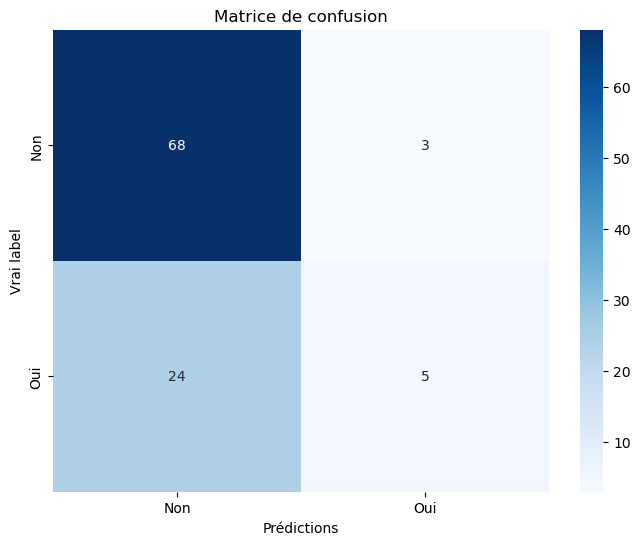


Rapport de classification:

              precision    recall  f1-score   support

         Non       0.74      0.96      0.83        71
         Oui       0.62      0.17      0.27        29

    accuracy                           0.73       100
   macro avg       0.68      0.57      0.55       100
weighted avg       0.71      0.73      0.67       100



In [115]:
#### Évaluation du modèle

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=["Non", "Oui"], output_dict=False)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualisation de la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
    plt.title("Matrice de confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Vrai label")
    plt.show()

    print("\nRapport de classification:\n")
    print(report)

evaluate_model(model, X_test, y_test)

### 6. Déploiement du modèle 

In [118]:
#### Sauvegarde et chargement du modèle

import joblib

def save_model(model, file_name="model_rf.pkl"):
    joblib.dump(model, file_name)
    print(f"Modèle sauvegardé sous: {file_name}")

def load_model(file_name="model_rf.pkl"):
    return joblib.load(file_name)
# Sauvegarde du modèle
save_model(model)

Modèle sauvegardé sous: model_rf.pkl


In [120]:
# Chargement pour utilisation future
loaded_model = load_model()

In [122]:
#### Utilisation du modèle chargé pour une nouvelle prédiction
def predict_new_data(model, new_data, scaler, numerical_columns):
    # Appliquer le scaler uniquement sur les colonnes numériques
    new_data[numerical_columns] = scaler.transform(new_data[numerical_columns])
    return model.predict(new_data)

In [124]:
# Exemple de donnée fictive
new_data = pd.DataFrame({
    "Age": [30],
    "Température": [35],
    "Humidité": [70],
    "Précipitations": [150],
    "Sexe": [0],
    "Région": [1],
    "Proximité_eau_stagnante": [1],
    "Type_habitat": [0]
})

In [128]:
# Prédiction pour la nouvelle donnée
new_prediction = predict_new_data(loaded_model, new_data, scaler, numerical_columns)
print("Prédiction pour la nouvelle donnée:", new_prediction)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
